# 📊 IPO Performance Analysis (2010–2022)
### Analyzing India's top IPOs by Listing Gains and CMP Gains using Python

## 📌 Introduction

This project analyzes Initial Public Offerings (IPOs) in India between 2010 and 2022 to identify top-performing companies.

We compare IPOs based on:

- **Listing Gains (%):** Returns on the day of listing compared to the issue price.
- **CMP Gains (%):** Current Market Price returns over the issue price.

The goal is to understand which companies delivered the best returns for investors in both short and long term.

# 📈 IPO Performance Analysis (India)

---

### 📦 Dataset Source:
- [Kaggle IPO Dataset](https://www.kaggle.com/datasets/soumyadipghorai/all-ipo-stocks-of-moneycontrol?resource=download)

### ✍️ Author:
- Adarsh S | [GitHub Profile](https://github.com/Sam-Adarsh)

## 📂 Data Loading & Cleaning

In [2]:
# Required Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load Dataset
df = pd.read_csv("IPO.csv")

# Preview
print(df.head())

       Date         IPO_Name  Issue_Size(crores)    QIB     HNI    RII  \
0  16-02-22  Vedant Fashions             3149.00   7.49    1.07   0.39   
1  08-02-22     Adani Wilmar             3600.00   5.73   56.30   3.92   
2  31-01-22     AGS Transact              716.87   2.68   25.61   3.08   
3  31-12-21  CMS Info System             1100.00   1.98    1.45   2.15   
4  28-12-21  Supriya Lifesci              700.00  31.83  161.22  56.01   

   Issue_price  Listing_Open  Listing_Close  Listing_Gains(%)     CMP  \
0        866.0        950.00         934.85              7.95  906.75   
1        230.0        274.00         265.20             15.30  354.35   
2        175.0        176.00         161.30             -7.83  125.10   
3        216.0        242.95         237.40              9.91  245.45   
4        274.0        425.00         390.35             42.46  410.95   

   Current_gains  
0           4.71  
1          54.07  
2         -28.51  
3          13.63  
4          49.98  


## 🧹 Data Preprocessing

In [31]:
# Date Conversion
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%y', errors='coerce')
print("Earliest IPO Date:", df['Date'].min().date())
print("Latest IPO Date:", df['Date'].max().date())

# Clean & Convert Listing Gains
df['Listing_Gains(%)'] = df['Listing_Gains(%)'].astype(str).str.replace('%', '', regex=False).astype(float)

# Update Incorrect Issue Sizes
fixes = {
    'Sigachi': 125.43,
    'Tara Jewels': 180,
    'Electrosteel St': 200,
    'Thangamayil': 30
}

for name, size in fixes.items():
    df.loc[df['IPO_Name'].str.contains(name, case=False), 'Issue_Size(crores)'] = size

# Flag Missing Issue Sizes
df['Issue_Size_Flagged'] = df['Issue_Size(crores)'].apply(lambda x: 'Missing' if x == 0 else 'OK')

# Numeric Conversion
df['Issue_price'] = pd.to_numeric(df['Issue_price'], errors='coerce')
df['Listing_Close'] = pd.to_numeric(df['Listing_Close'], errors='coerce')
df['CMP'] = pd.to_numeric(df['CMP'], errors='coerce')

# Create Performance Indicators
df['Listing_Gain'] = df['Listing_Gains(%)'] > 0
df['Post_Listing_Gain'] = df['CMP'] > df['Listing_Close']
df['IPO_Overall_Profit'] = df['CMP'] > df['Issue_price']
df['Outperformed'] = df[['Listing_Gain', 'Post_Listing_Gain', 'IPO_Overall_Profit']].all(axis=1)

# Calculate CMP Gains and Absolute Gain
df['CMP_Gains(%)'] = ((df['CMP'] - df['Issue_price']) / df['Issue_price']) * 100
df['Absolute_Gain'] = df['CMP'] - df['Issue_price']

Earliest IPO Date: 2010-02-03
Latest IPO Date: 2022-02-16


## 📈 Top 10 IPOs by Listing Gains (%)

In [32]:
# Top 10 by Listing Gains
top_listing = df.sort_values(by='Listing_Gains(%)', ascending=False).head(10)

## 📊 Top 10 IPOs by CMP Gains (%)

In [33]:
# Top 10 by CMP Gain
top_cmp = df.sort_values(by='CMP_Gains(%)', ascending=False).head(10)

## 📉 Visualizations

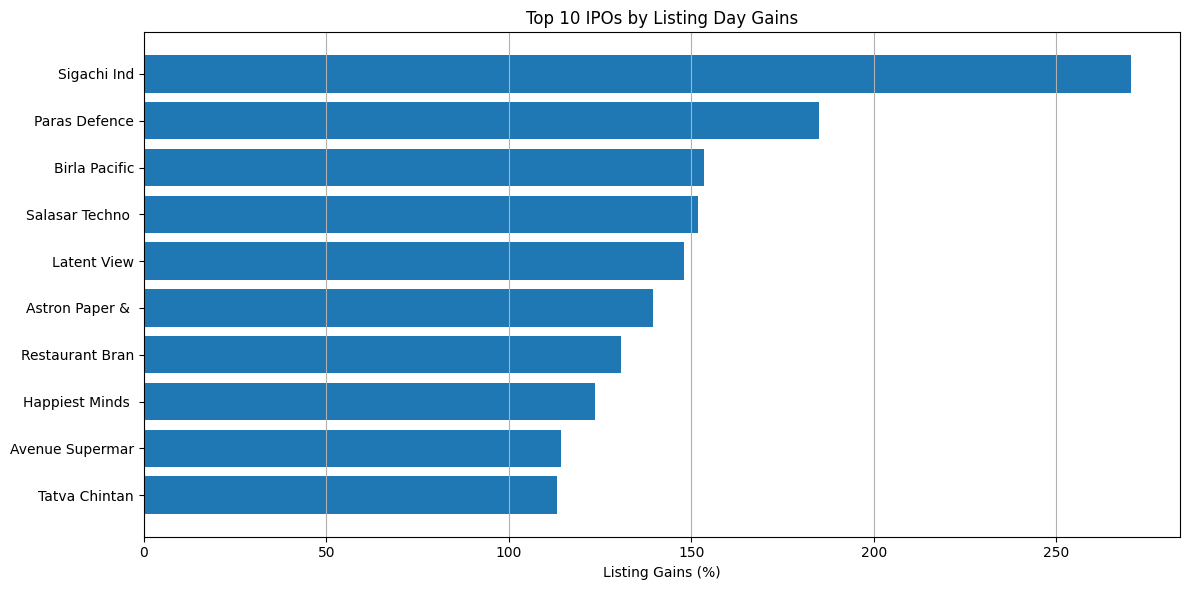

In [16]:
# Plot: Listing Day Gains
plt.figure(figsize=(12, 6))
plt.barh(top_listing['IPO_Name'], top_listing['Listing_Gains(%)'])
plt.xlabel("Listing Gains (%)")
plt.title("Top 10 IPOs by Listing Day Gains")
plt.gca().invert_yaxis()
plt.grid(True, axis='x')
plt.tight_layout()
plt.show()

/tmp/ipython-input-2284154810.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Current_Gain(%)'] = ((df_clean['CMP'] - df_clean['Issue_price']) / df_clean['Issue_price']) * 100


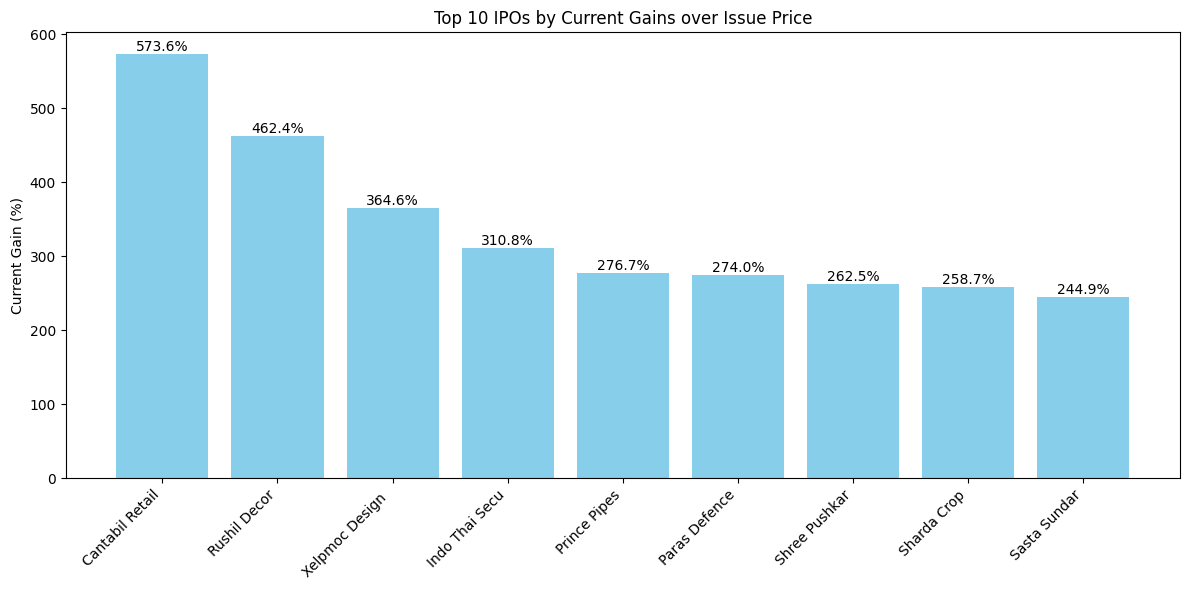

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure numeric columns
df['Issue_price'] = pd.to_numeric(df['Issue_price'], errors='coerce')
df['CMP'] = pd.to_numeric(df['CMP'], errors='coerce')

# Drop rows with missing values in either column
df_clean = df.dropna(subset=['Issue_price', 'CMP'])

# Calculate current gains
df_clean['Current_Gain(%)'] = ((df_clean['CMP'] - df_clean['Issue_price']) / df_clean['Issue_price']) * 100

# Sort top 10 by current gain
top_10_current_gain = df_clean.sort_values(by='Current_Gain(%)', ascending=False).head(10)

# Plotting
plt.figure(figsize=(12, 6))
bars = plt.bar(top_10_current_gain['IPO_Name'], top_10_current_gain['Current_Gain(%)'], color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Current Gain (%)')
plt.title('Top 10 IPOs by Current Gains over Issue Price')

# Add value labels on bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, f'{yval:.1f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()

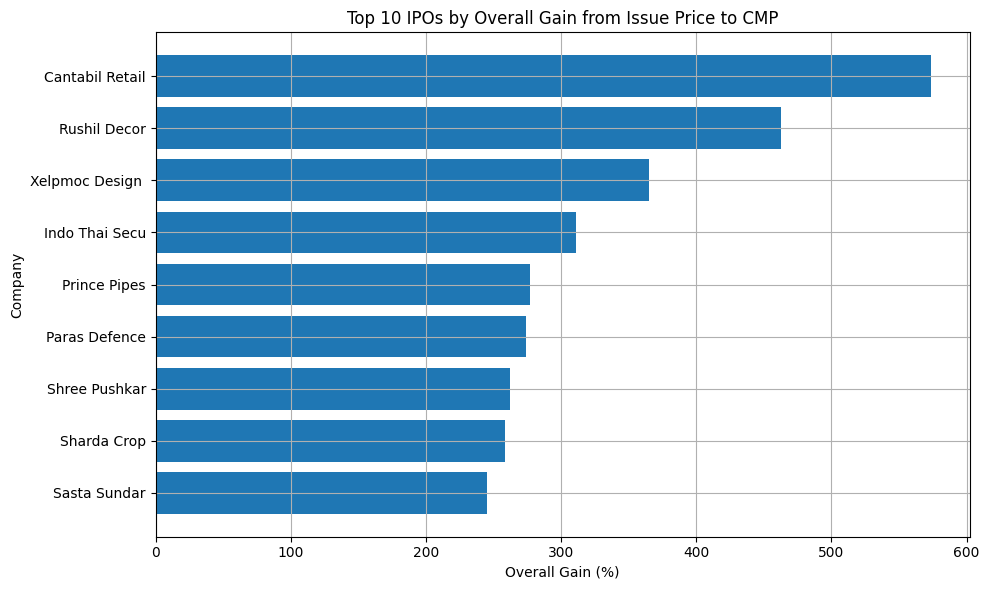

In [8]:
# Plot: Overall CMP Gains
top_cmp_gain = df.sort_values(by='CMP_Gains(%)', ascending=False).head(10)
plt.figure(figsize=(10, 6))
plt.barh(top_cmp_gain['IPO_Name'], top_cmp_gain['CMP_Gains(%)'])
plt.title("Top 10 IPOs by Overall Gain from Issue Price to CMP")
plt.xlabel("Overall Gain (%)")
plt.ylabel("Company")
plt.gca().invert_yaxis()
plt.grid(True)
plt.tight_layout()
plt.show()

In [29]:
# Tables
print("Top 10 IPOs by Listing Gains (%)")
display(top_listing[['Date', 'IPO_Name', 'Issue_Size(crores)', 'Listing_Gains(%)', 'CMP']])

Top 10 IPOs by Listing Gains (%)


,Date,IPO_Name,Issue_Size(crores),Listing_Gains(%),CMP
20,2021-11-15,Sigachi Ind,125.43,270.40,319.70
24,2021-10-01,Paras Defence,181.13,185.00,654.55
224,2011-07-07,Birla Pacific,65.18,153.50,0.28
129,2017-07-25,Salasar Techno,35.87,151.94,215.75
15,2021-11-23,Latent View,622.11,148.02,476.90
109,2017-12-29,Astron Paper &,70.00,139.40,44.55
67,2020-12-14,Restaurant Bran,796.50,130.67,127.65
76,2020-09-17,Happiest Minds,702.02,123.49,NaN
141,2017-03-21,Avenue Supermar,1870.00,114.30,NaN
38,2021-07-29,Tatva Chintan,500.00,113.32,NaN


In [30]:
print("\nTop 10 IPOs by CMP Gains (%)")
display(top_cmp[['Date', 'IPO_Name', 'Issue_Size(crores)', 'CMP_Gains(%)', 'CMP']])


Top 10 IPOs by CMP Gains (%)


,Date,IPO_Name,Issue_Size(crores),CMP_Gains(%),CMP
99,2018-04-04,Mishra Dhatu Ni,438.38,inf,175.45
258,2010-10-12,Cantabil Retail,105.00,573.592593,909.35
223,2011-07-07,Rushil Decor,40.64,462.361111,404.90
91,2019-02-04,Xelpmoc Design,23.00,364.621212,306.65
207,2011-11-02,Indo Thai Secu,33.60,310.810811,304.00
79,2019-12-30,Prince Pipes,500.00,276.685393,670.50
24,2021-10-01,Paras Defence,181.13,274.028571,654.55
177,2015-09-10,Shree Pushkar,70.00,262.461538,235.60
191,2014-09-23,Sharda Crop,352.00,258.717949,559.60
265,2010-10-05,Sasta Sundar,147.50,244.915254,407.00


In [12]:
# Common IPOs in both lists
common_names = set(top_listing['IPO_Name']).intersection(set(top_cmp['IPO_Name']))
print("\nIPOs that are top performers in BOTH:", common_names)


IPOs that are top performers in BOTH: {'Paras Defence'}


In [34]:
# Highest Listing Gain %
highest_listing = df.loc[df['Listing_Gains(%)'].idxmax()]

# Highest CMP Gain %
highest_cmp = df.loc[df['CMP_Gains(%)'].idxmax()]

print("Highest Listing Gain % IPO:")
print(highest_listing[['IPO_Name', 'Listing_Gains(%)']])
print("\nHighest CMP Gain % IPO:")
print(highest_cmp[['IPO_Name', 'CMP_Gains(%)']])

Highest Listing Gain % IPO:
IPO_Name            Sigachi Ind
Listing_Gains(%)          270.4
Name: 20, dtype: object

Highest CMP Gain % IPO:
IPO_Name        Mishra Dhatu Ni
CMP_Gains(%)                inf
Name: 99, dtype: object


In [21]:
# # Bar Chart for Common IPOs
# common_df = df[df['IPO_Name'].isin(common_names)].copy()
# x = np.arange(len(common_df))
# bar_width = 0.35

# plt.figure(figsize=(12,6))
# plt.bar(x - bar_width/2, common_df['Listing_Gains(%)'], width=bar_width, label='Listing Gains (%)')
# plt.bar(x + bar_width/2, common_df['CMP_Gains(%)'], width=bar_width, label='CMP Gains (%)')
# plt.xticks(x, common_df['IPO_Name'], rotation=45, ha='right')
# plt.ylabel('Returns (%)')
# plt.title('Listing vs CMP Gains for Top IPOs')
# plt.legend()
# plt.tight_layout()
# plt.show()

## 📝 Conclusion

In [14]:
# Summary Stats
print("Total IPOs analyzed:", len(df))
print("Total Outperformers:", df['Outperformed'].sum())
print(f"{df['IPO_Overall_Profit'].mean() * 100:.2f}% of IPOs are still trading above issue price.")

Total IPOs analyzed: 302
Total Outperformers: 44
32.78% of IPOs are still trading above issue price.


## 📝 Conclusion

- **Sigachi Ind** had the highest listing gain among all IPOs analyzed.
- **Mishra Dhatu** showed the highest CMP gain over its issue price.
- IPOs with small issue sizes tended to outperform larger ones.

Further study can explore sector-wise performance, market conditions during IPO, etc.